# Exploratory Data Analysis of Salary Variation based on Demographics


In [10]:
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
# importing data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [14]:
# loading dataset
import os
full_path = "C:/Users/yashj/Downloads"
os.chdir(full_path)



In [15]:
df= pd.read_csv('Dataset.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


### Data Preprocessing

In [19]:
# checking dataset shape
df.shape

(6704, 9)

In [20]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

In [21]:
# checking dataset missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [22]:
df.dropna(axis=0,inplace=True)

In [23]:
# Checking missing values again
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

Dropping Unnamed Column beacuse it is just an index column

In [24]:
df = df.drop(labels= ['Unnamed: 0'],axis=1)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [11]:
# unique values in each columns
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [25]:
# groping job title
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [26]:
def job_title(job_title):
    job_title = str(job_title).lower()
    
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    
    elif 'project manager' in job_title:
        return 'Project Manager'
    
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    
    else:
        return 'Other'


In [27]:
df['Job Title'] = df['Job Title'].apply(job_title)

In [28]:
# groping Education Level
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [29]:
def edu_level(education):
    
    education = str(education).lower()
    
    if 'high school' in education:
        return 'High School'
    
    elif 'bachelor\'s' in education:
        return 'Bachelors'
    
    elif 'master\'s' in education:
        return 'Masters'
    
    elif 'phd' in education:
        return 'PhD'

    
    
df['Education Level'] = df['Education Level'].apply(edu_level)

### Descriptive Stattistics

In [30]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [31]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


## EDA (Exploratory Data Analysis)

### Pie chart for Gender

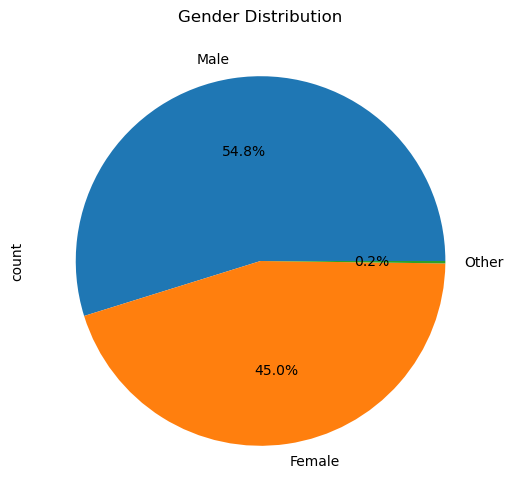

In [32]:
plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

### Histplot for Age Distribution

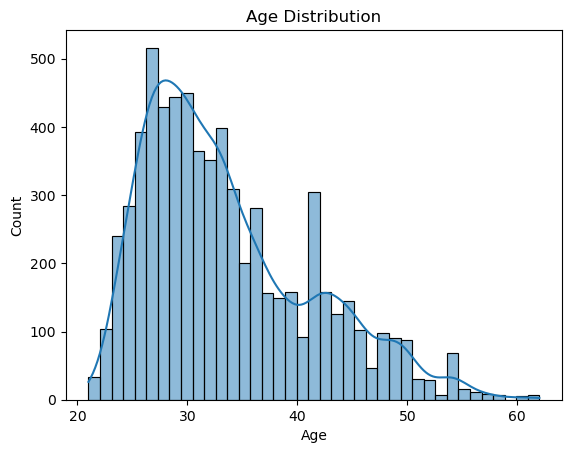

In [33]:
sns.histplot(data=df,x='Age',kde=True)
plt.title('Age Distribution')
plt.show()

### Countplot for Education Level

<Axes: xlabel='Education Level', ylabel='count'>

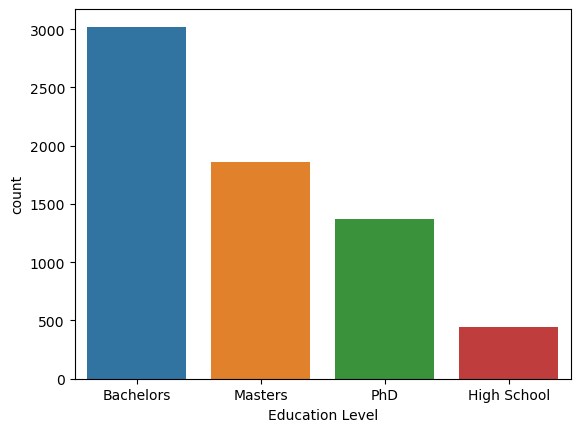

In [21]:
sns.countplot(data=df,x='Education Level')

### Countplot for Job Title

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

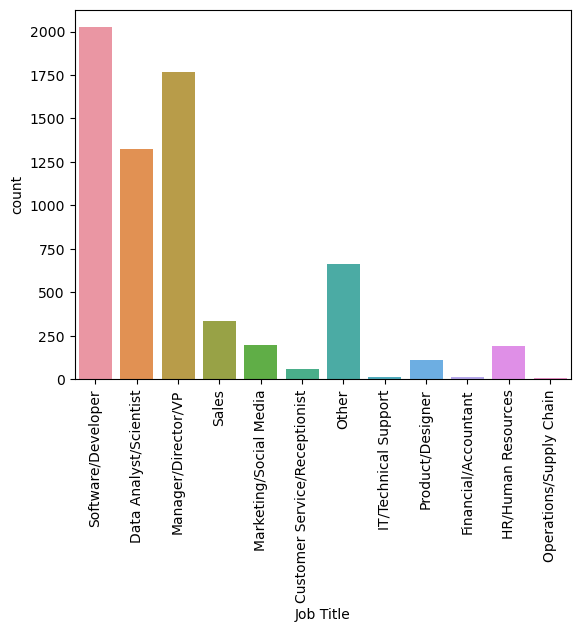

In [22]:
sns.countplot( data = df,x='Job Title')
plt.xticks(rotation=90)

### Histplot for Years of Experience

<Axes: xlabel='Years of Experience', ylabel='Count'>

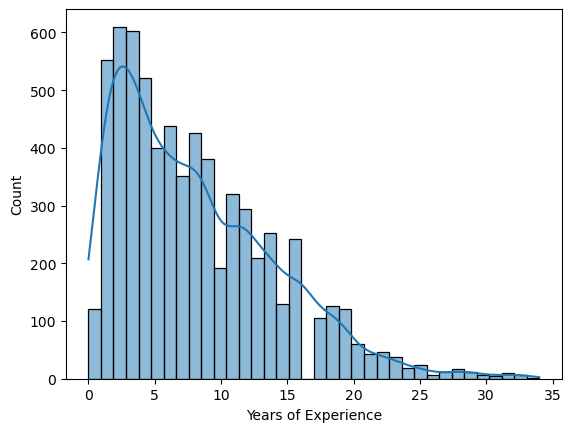

In [23]:
sns.histplot(data = df,x='Years of Experience',kde=True)

### Countplot for Country

<Axes: xlabel='Country', ylabel='count'>

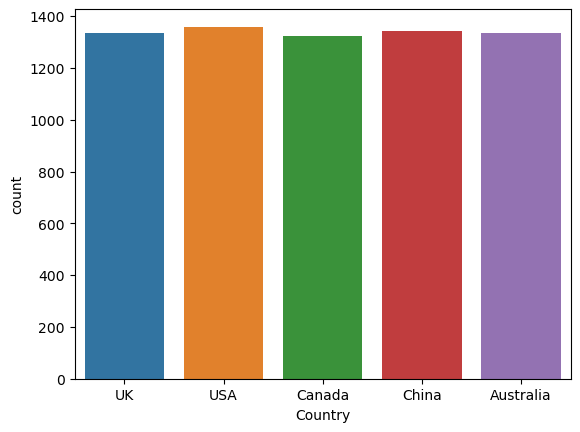

In [24]:
sns.countplot(data=df ,x='Country')

### Countplot fro Race Distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

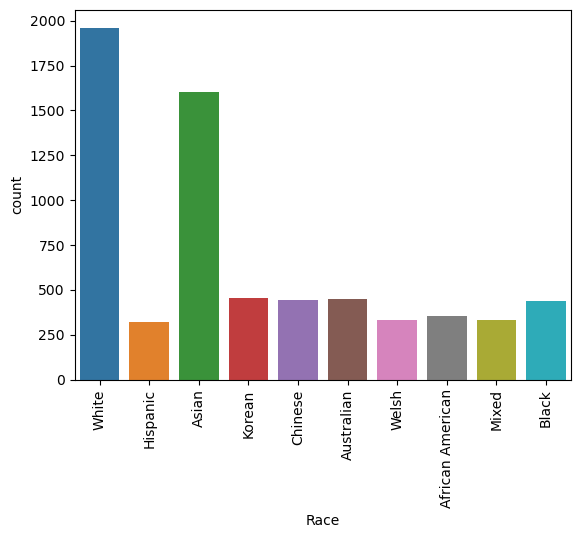

In [25]:
sns.countplot(data=df,x='Race')
plt.xticks(rotation=90)

### Scatter plot for Salary and Age

Text(0.5, 1.0, 'Salary and Age')

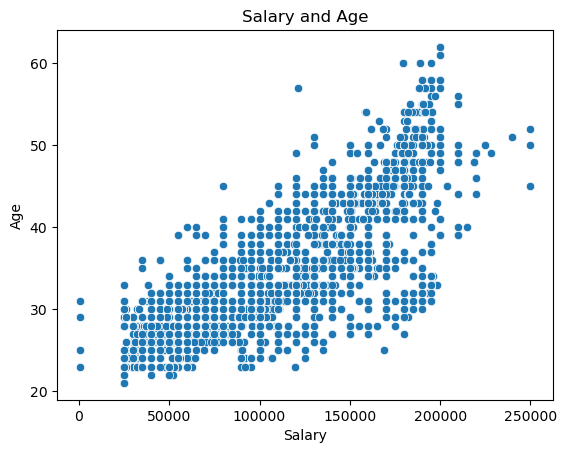

In [26]:
sns.scatterplot(data=df,x='Salary',y='Age')
plt.title('Salary and Age')

### Borplot and Violinplot for Gender and Salary

Text(0.5, 1.0, 'Gender VS Salary')

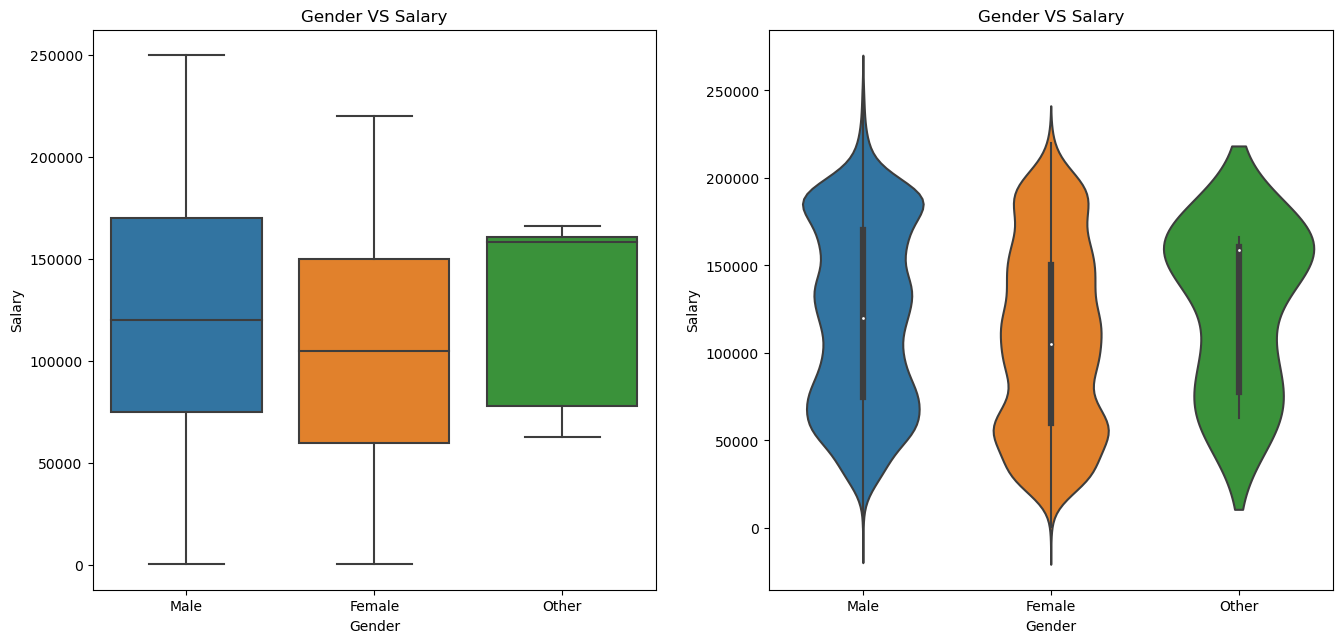

In [27]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
sns.boxplot(data=df,x='Gender',y='Salary')
plt.title('Gender VS Salary')

plt.subplot(2,2,2)
sns.violinplot(data=df,x='Gender',y='Salary')
plt.title('Gender VS Salary')

### Education Level and Salary

Text(0.5, 1.0, 'Education Level VS Salary')

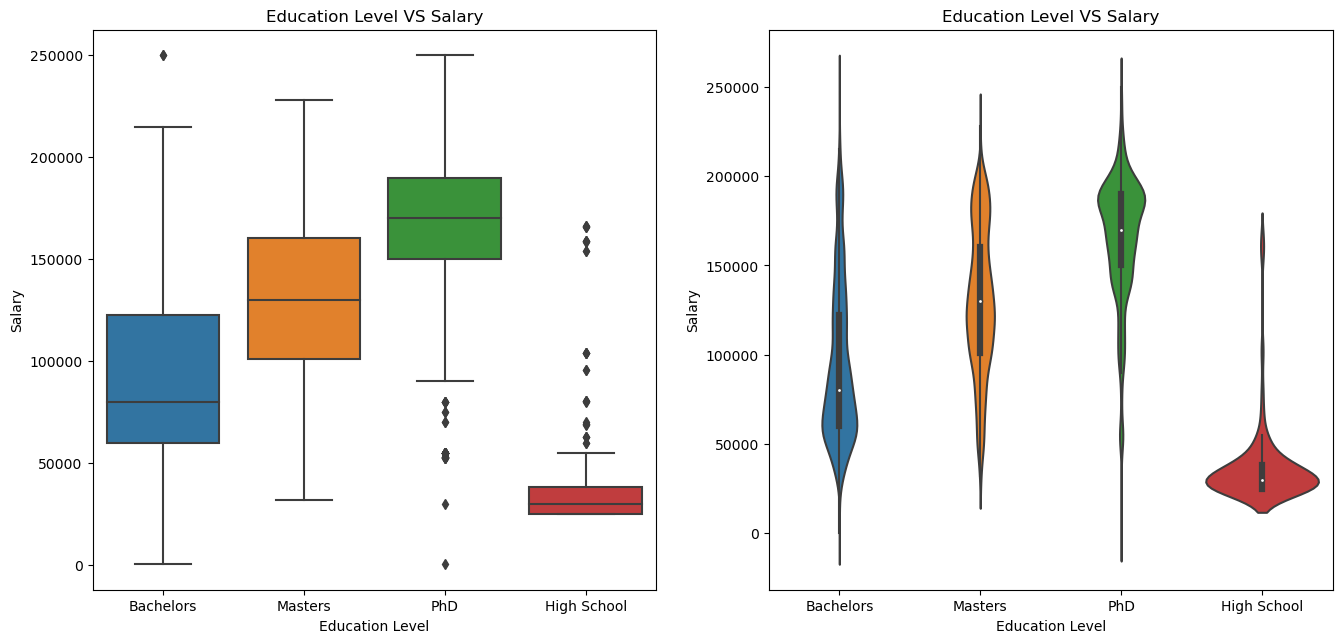

In [28]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
sns.boxplot(data=df,x='Education Level',y='Salary')
plt.title('Education Level VS Salary')

plt.subplot(2,2,2)
sns.violinplot(data=df,x='Education Level',y='Salary')
plt.title('Education Level VS Salary')

### Job Title and salary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

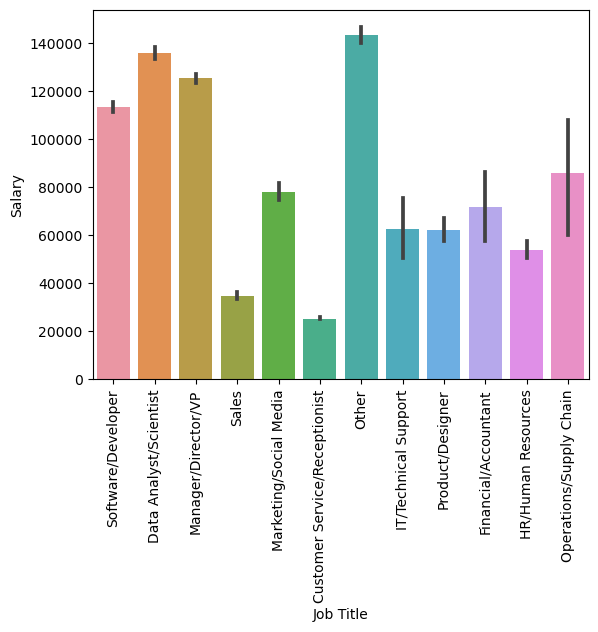

In [29]:
sns.barplot(data = df , x='Job Title' , y='Salary')
plt.xticks(rotation=90)

### Experience and Salary

<Axes: xlabel='Years of Experience', ylabel='Salary'>

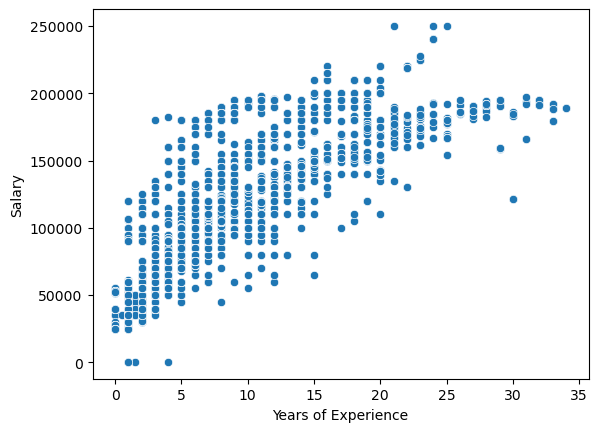

In [30]:
sns.scatterplot(data = df,x= 'Years of Experience', y = 'Salary')

### Country and Salary

Text(0.5, 1.0, 'Country VS Salary')

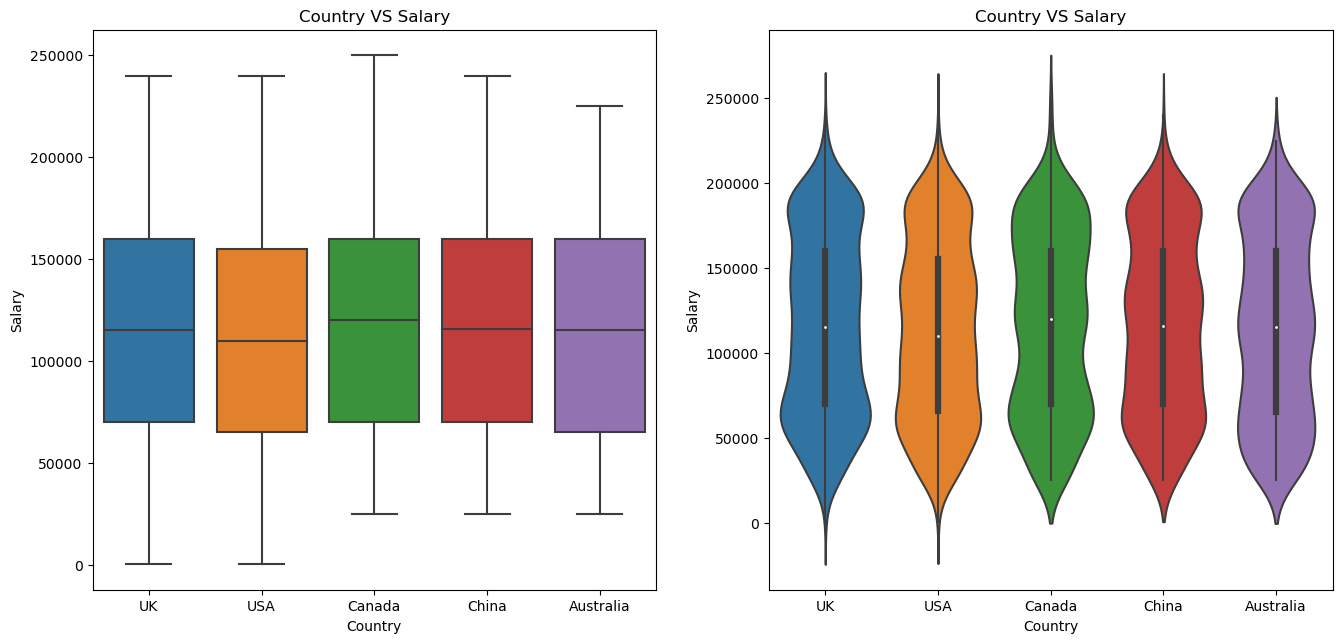

In [31]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
sns.boxplot(data=df,x='Country',y='Salary')
plt.title('Country VS Salary')

plt.subplot(2,2,2)
sns.violinplot(data=df,x='Country',y='Salary')
plt.title('Country VS Salary')

Text(0.5, 1.0, 'Race VS Salary')

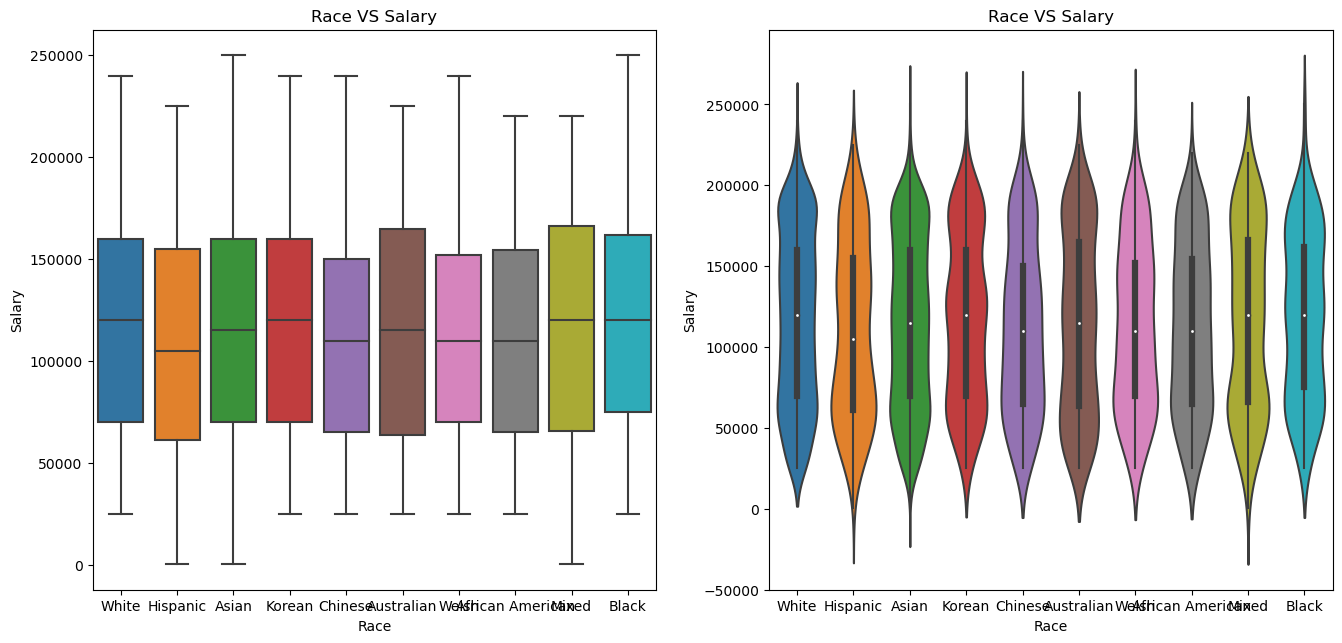

In [32]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
sns.boxplot(data=df,x='Race',y='Salary')
plt.title('Race VS Salary')

plt.subplot(2,2,2)
sns.violinplot(data=df,x='Race',y='Salary')
plt.title('Race VS Salary')

### Heatmap 

<Axes: >

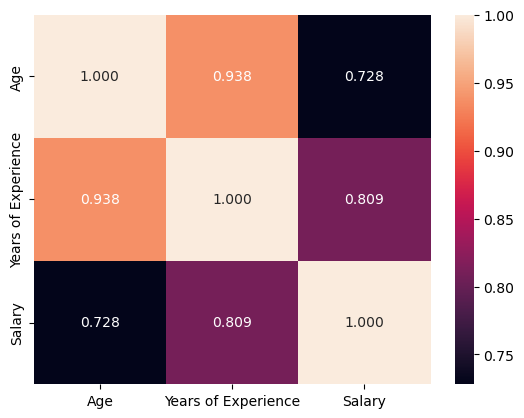

In [35]:
sns.heatmap(df.corr(),annot=True,fmt='.3f')

### Pair plot 

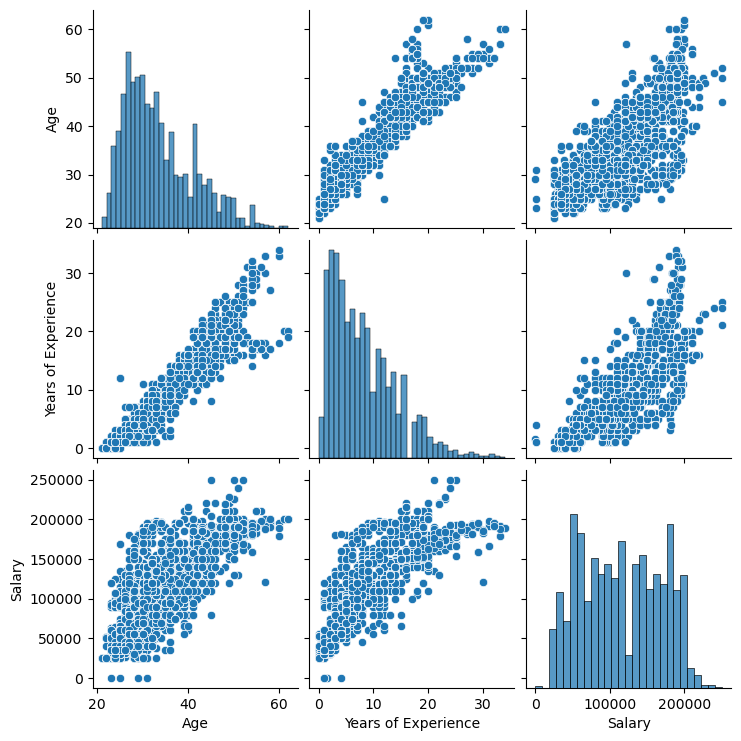

In [43]:
sns.pairplot(df)